# Stability and the phase plane

In [1]:
using CairoMakie,Printf,LinearAlgebra

The homogeneous system $\mathbf{x}'=\mathbf{A}\mathbf{x}$ for a constant matrix $\mathbf{A}$ clearly has the constant function $\mathbf{x}(t)\equiv \bfzero$ as a solution. We call this an **equilibrium** or steady-state solution. (If $\mathbf{A}$ is singular, then there are other equilibrium points as well, but we are not interested in that peculiar case.)

## Stability

Not all equilibria are alike. 

Imagine holding a broom by two fingers, with the bristles pointing straight down at the floor. You will not have much difficulty keeping the broom in approximately this position for a long time, even if an annoying friend comes by and jostles you a bit. 

Now imagine holding the broom inverted, with the bristles pointing toward the ceiling. If you were able to *perfectly* balance the center of gravity of a *perfectly* symmetric broom above your fingers, then in principle it ought to stay there. However, the broom is not perfect, and your arm and fingers can't stay perfectly still. With effort, you might keep the broom upright for a few seconds, but not for a long time. Both the downward and upward positions of the broom are equilibria. The property that differentiates them is **stability**. (We will return to the nonlinear pendulum in {numref}`section-nl-linearization**.)

Stability refers to the response of the system to a perturbation (tiny change) of its state away from an equilibrium. If the system eventually returns to the equilibrium point (in the sense of the limit $t\to\infty$), we say the equilibrium is **asymptotically stable**. That is, the perturbation decays away, like with a damped linear oscillator. A weaker form of stability is explained at the end of the section. If the system has tiny perturbations that grow without bound, then the equilibrium is **unstable**.

Stability of the origin depends on the eigenvalues of $\mathbf{A}$. This is most easily summarized in the special case of a $2\times 2$ real matrix with eigenvalues $\lambda_1,\lambda_2$. The major cases to be considered are summarized in the following table, leaving out some trickier edge cases when things are zero or exactly equal. The other column of the table is to be explained next.

(table-phase_plane-stability)=
:::{list-table} Eigenvalues and stability
:header-rows: 1 
:name: table-fs-stability

* - Eigenvalues
  - Stability
  - Type
* - $\lambda_1 < \lambda_2 < 0$
  - asymptotically stable
  - node
* - $\lambda_1 < 0 < \lambda_2 $
  - unstable
  - saddle
* - $0 < \lambda_1 < \lambda_2 $
  - unstable
  - node
* - $\lambda = a\pm i b,\: a< 0$
  - asymptotically stable
  - spiral
* - $\lambda = \pm i b$
  - stable, not asymptotically stable
  - center
* - $\lambda = a\pm i b,\: a> 0$
  - unstable
  - spiral
:::

## Phase plane

In the two-dimensional case, the solutions of $\mathbf{x}'=\mathbf{A}\mathbf{x}$ can be plotted as trajectories parameterized by time in the $(x_1,x_2)$ plane, often called the **phase plane**. Each of the cases in the {numref}`table-phase_plane-stability` has a characteristic type of phase plane portrait that illustrates major aspects of solution behaviors.  

### Node

When the eigenvalues are real and have the same sign, the steady state is called a **node**. If the sign is negative, all trajectories head into the steady state and it is stable; conversely, in the positive case it is unstable. 

Here is a phase plane plot for $\mathbf{A}=\twomat{-4}{-1}{-2}{-5}$, which has eigenvalues $-3$ and $-6$.

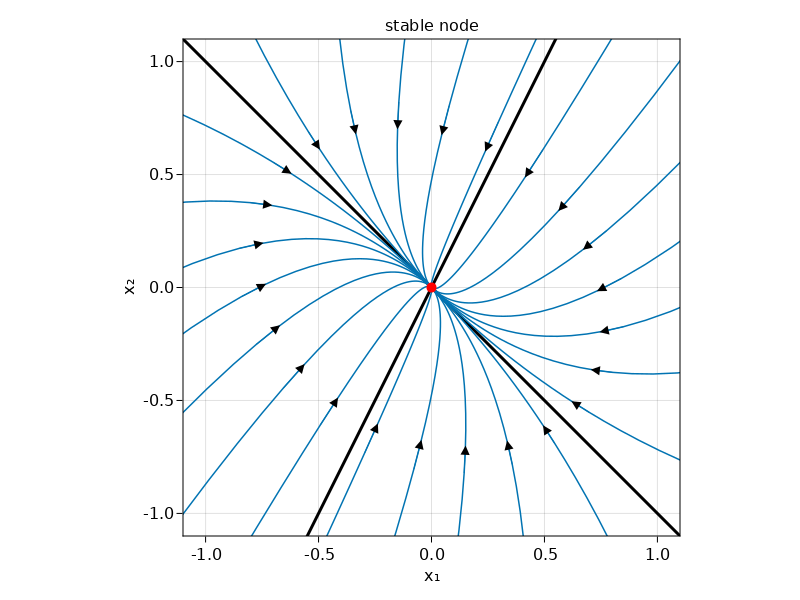

In [2]:
A = [-4 -1; -2 -5]
λ,V = eigen(A)

# plot eigenvectors
P = Point2.(eachcol(V))
fig,ax,scat = lines([-5P[1],5P[1],Point2([NaN,NaN]),-5P[2],5P[2]],color=:black,linewidth=3,
    axis = (xlabel = "x₁",ylabel = "x₂") )

colr = cgrad(:seaborn_colorblind)[1:8]
t = range(-0.5,8,300)
x = zeros(2,300)
xa = Point2{Float64}[]
da = Point2{Float64}[]
ab = 20
for theta in 2pi*(0.5:23.5)/24
	for j in 1:length(t)
		X = exp(t[j]*A);
		x[:,j] = X*[ cos(theta), sin(theta) ];
	end
	lines!(x[1,:],x[2,:],color=colr[1])
  push!(xa,Point2(x[:,ab]))
  push!(da,Point2(x[:,ab+1]-x[:,ab]))
end

arrows!(xa,1da,linecolor=colr[1],arrowsize=12)
scatter!([0],[0],markersize=10,color=:red)

limits!(1.1*[-1,1,-1,1]...)
ax.title = ("stable node")
ax.aspect = DataAspect()

fig

The black lines show the directions of the eigenvectors. An initial state on one of those lines stays on it forever. Other initial conditions follow a path tending to become parallel to eigenvector $\mathbf{v}_1$, since the other component decays out more quickly. The plot for $-\mathbf{A}$ would just reverse all of the arrows and show an unstable steady state. 

### Saddle

When the eigenvalues are real and of different signs, the steady state is called a 
**saddle**. A saddle point is always unstable. The part of the solution along the negative eigenvector decays away, but the contribution from the positive eigenvector grows with time. 

Here is a phase plane plot for $\mathbf{A}=\twomat{-2}{-3}{-6}{-5}$, which has eigenvalues $1$ and $-8$.

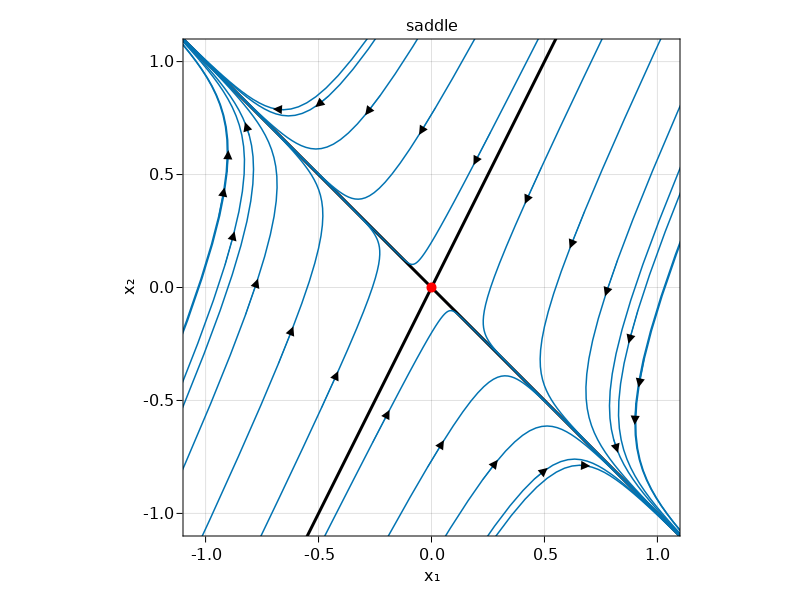

In [3]:
A = [-2 -3; -6 -5]
λ,V = eigen(A)

# plot eigenvectors
P = Point2.(eachcol(V))
fig,ax,scat = lines([-5P[1],5P[1],Point2([NaN,NaN]),-5P[2],5P[2]],color=:black,linewidth=3,
    axis = (xlabel = "x₁",ylabel = "x₂") )

colr = cgrad(:seaborn_colorblind)[1:8]
t = range(-0.5,8,300)
x = zeros(2,300)
xa = Point2{Float64}[]
da = Point2{Float64}[]
ab = 20
for theta in 2pi*(0.5:23.5)/24
	for j in 1:length(t)
		X = exp(t[j]*A);
		x[:,j] = X*[ cos(theta), sin(theta) ];
	end
	lines!(x[1,:],x[2,:],color=colr[1])
  push!(xa,Point2(x[:,ab]))
  push!(da,Point2(x[:,ab+1]-x[:,ab]))
end

arrows!(xa,1da,linecolor=colr[1],arrowsize=12)
scatter!([0],[0],markersize=10,color=:red)

limits!(1.1*[-1,1,-1,1]...)
ax.title = ("saddle")
ax.aspect = DataAspect()

fig

An initial condition exactly on the stable black line (eigenvector) will approach the origin, but anything else ends up shooting away more or less in the direction of the unstable eigenvector.  

(section-fs-pp-center)=
### Spiral

When the eigenvalues are complex conjugates with nonzero real part, the steady state is called a **spiral**. If the eigenvalues are $a \pm i b$, then all solutions contain $e^{at}e^{\pm i b t}$, or equivalently, $e^{at}\cos{b t}$ and $e^{at}\sin{b t}$. The real part causes growth and instability if $a> 0$, or decay and stability if $a < 0$. The imaginary part determines the angular speed of the spiral. 

Here is a phase plane plot for $\mathbf{A}=\twomat{1}{-2}{4}{-3}$, which has eigenvalues $-1\pm 2i$.

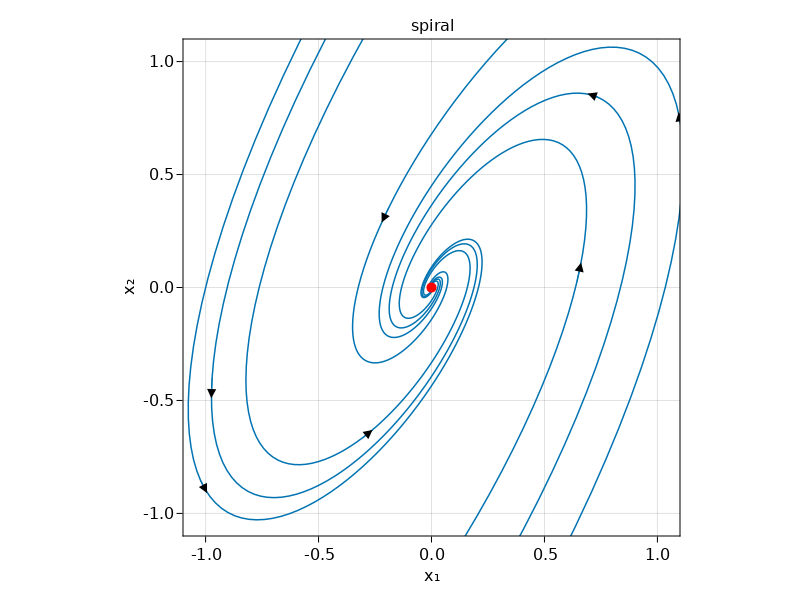

In [4]:
A = [1 -2; 4 -3];
λ,V = eigen(A)

# plot eigenvectors
P = Point2.(eachcol(V))
fig,ax,scat = lines([NaN],[NaN],color=:black,linewidth=3,
    axis = (xlabel = "x₁",ylabel = "x₂") )

colr = cgrad(:seaborn_colorblind)[1:8]
t = range(-1,7,300)
x = zeros(2,300)
xa = Point2{Float64}[]
da = Point2{Float64}[]
ab = 50
for theta in 2pi*(0.5:6.5)/7
	for j in 1:length(t)
		X = exp(t[j]*A);
		x[:,j] = X*[ cos(theta), sin(theta) ];
	end
	lines!(x[1,:],x[2,:],color=colr[1])
  push!(xa,Point2(x[:,ab]))
  push!(da,Point2(x[:,ab+1]-x[:,ab]))
end

arrows!(xa,1da,linecolor=colr[1],arrowsize=12)
scatter!([0],[0],markersize=10,color=:red)

limits!(1.1*[-1,1,-1,1]...)
ax.title = ("spiral")
ax.aspect = DataAspect()

fig

The eigenvectors are complex and don't show up on the plot; there are no purely linear trajectories as in the other cases.

### Center

The special case of imaginary eigenvalues, $\lambda=\pm i b$, is called a **center**. You can think of the trajectories as spirals that are perfectly neutral — that is, circles or ellipses. These equilibria are often associated with conservation principles, such as conservation of energy. 

Here is a phase plane plot for $\mathbf{A}=\twomat{0}{-1}{4}{0}$, which has eigenvalues $\pm 2i$.

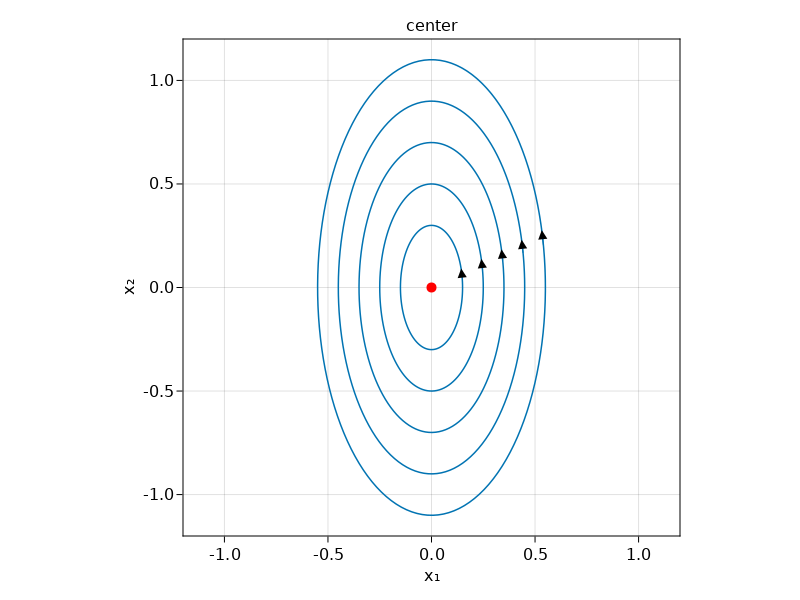

In [5]:
A = [0 -1; 4 0];
λ,V = eigen(A)

# plot eigenvectors
P = Point2.(eachcol(V))
fig,ax,scat = lines([NaN],[NaN],color=:black,linewidth=3,
    axis = (xlabel = "x₁",ylabel = "x₂") )

colr = cgrad(:seaborn_colorblind)[1:8]
t = range(0,7,300)
x = zeros(2,300)
xa = Point2{Float64}[]
da = Point2{Float64}[]
ab = 5
for r = 0.15:0.1:0.55
	for j = 1:length(t)
		X = exp(t[j]*A);
		x[:,j] = X*[r; 0];
	end
	lines!(x[1,:],x[2,:],color=colr[1])
    push!(xa,Point2(x[:,ab]))
    push!(da,Point2(x[:,ab+1]-x[:,ab]))
end

arrows!(xa,1da,linecolor=colr[1],arrowsize=12)
scatter!([0],[0],markersize=10,color=:red)

limits!(1.2*[-1,1,-1,1]...)
ax.title = ("center")
ax.aspect = DataAspect()

fig

A center is on a knife edge between asymptotically stable and unstable: small perturbations do not decay away, but they also can grow only by a bounded amount. This situation might be called *weakly stable*, *neutrally stable*, or simply **stable** but not asymptotically stable.